Linear Regression and Train/Test Split challenges

Ideally, try these with your own data! (Alternatively, there is the 2013_movies.csv data set.)

Challenge 1

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

Challenge 2

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

Challenge 3

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

Challenge 4

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

Challenge 5

Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

In [337]:
import pandas as pd
import numpy as np
import scipy

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from patsy import dmatrices

%matplotlib inline

#import statsmodels.formula.api as smf

In [318]:
df = pd.read_csv("2013_movies.csv")
df.head(5)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


## Challenge 1

In [319]:
y, X = dmatrices('DomesticTotalGross ~ 1', data=df, return_type='dataframe')
model = LinearRegression()
model.fit(X,y)
y_hat = model.predict(X)


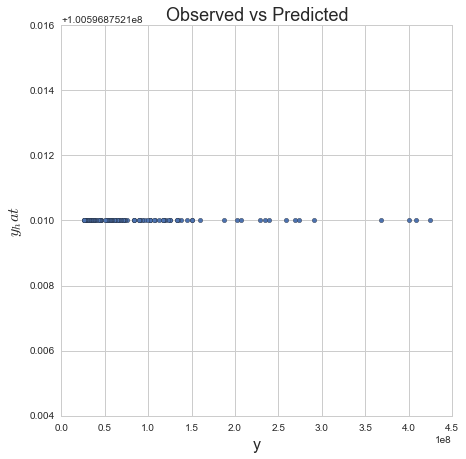

In [324]:
plt.figure(figsize = (7,7))
sns.set(context="notebook", style = 'whitegrid', color_codes=True)

pplot = plt.scatter(y, y_hat)
plt.xlabel('y', fontsize = 16)
plt.ylabel('$y_hat$', fontsize = 16)
plt.title("Observed vs Predicted", fontsize=18)


Predicted value is nothing else but the average of DomesticTotalGross.

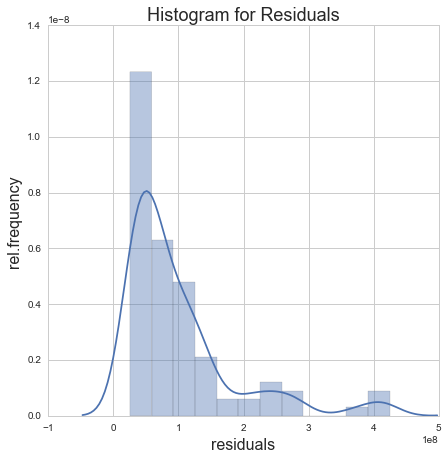

In [325]:
plt.figure(figsize = (7,7))
sns.set(context="notebook", style = 'whitegrid', color_codes=True)

residuals = y - y_hat
pplot = sns.distplot(y)
plt.xlabel('residuals', fontsize = 16)
plt.ylabel('rel.frequency', fontsize = 16)
plt.title("Histogram for Residuals", fontsize=18)


Residuals are not normally distributed around 0, actually the histogram is skewed to the right.

## Challenge 2

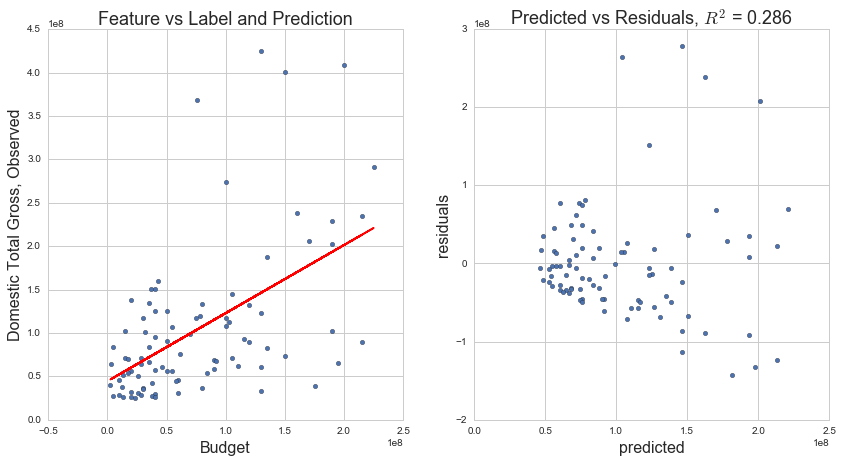

In [326]:
y, X = dmatrices('DomesticTotalGross ~ Budget', data=df, return_type='dataframe')
model = LinearRegression()
model.fit(X,y)
y_hat = model.predict(X)
residuals = y - y_hat

plt.figure(figsize=(14, 7))
sns.set(context="notebook", style = 'whitegrid', color_codes=True)
plt.subplot(1, 2, 1)
plt.scatter(X.Budget, y)
plt.plot(X.Budget, y_hat, color = 'red')
plt.xlabel('Budget', fontsize = 16)
plt.ylabel('Domestic Total Gross, Observed', fontsize = 16)
plt.title("Feature vs Label and Prediction", fontsize=18)

plt.subplot(1, 2, 2)
plt.scatter(y_hat, residuals)
plt.xlabel('predicted', fontsize = 16)
plt.ylabel('residuals', fontsize = 16)

plt.title("Predicted vs Residuals, $R^2$ = " + "{0:.3f}".format(model.score(X, y)), fontsize=18)


On the left, the feature variable, Budget, is plotted against the label, Domestic Total Gross. The red line represents predicted values fitted my OLS algorithm. It seems that data does follow a line pattern, however to assess the model fit, take a look at the plot on the right. 
The plot of residuals and computed score are not that optimistic. R-squared is less than 30% and residulas show non constant variance, heteroscedascicity.

## Challenge 3

(-200000000.0, 250000000.0)

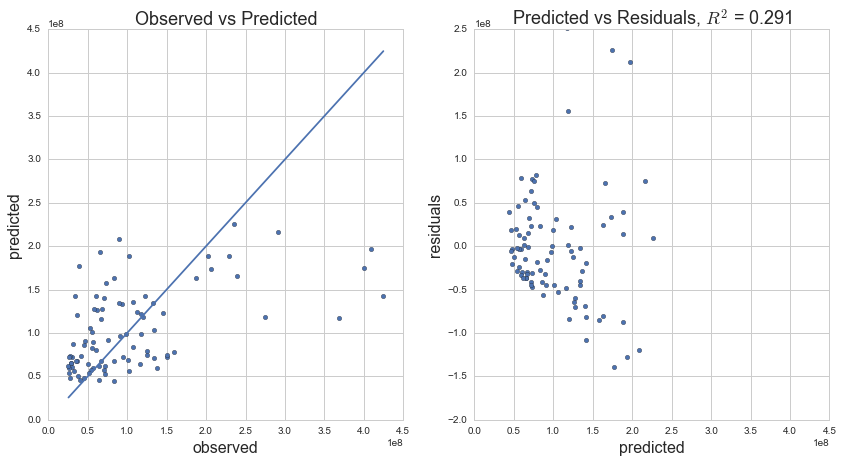

In [371]:
y, X = dmatrices('DomesticTotalGross ~ Budget + Rating', data=df, return_type='dataframe')
model = LinearRegression()
model.fit(X,y)
y_hat = model.predict(X)
residuals = y - y_hat

plt.figure(figsize=(14, 7))
sns.set(context="notebook", style = 'whitegrid', color_codes=True)

plt.subplot(1,2,1)
plt.scatter(y, y_hat)
plt.plot(y,y)
plt.xlabel('observed', fontsize = 16)
plt.ylabel('predicted', fontsize = 16)
plt.title("Observed vs Predicted", fontsize=18)
ax = plt.gca()
ax.set_xlim(0,4.5e8)
ax.set_ylim(0,4.5e8)

plt.subplot(1,2,2)
plt.scatter(y_hat, residuals)
plt.xlabel('predicted', fontsize = 16)
plt.ylabel('residuals', fontsize = 16)
plt.title("Predicted vs Residuals, $R^2$ = " + "{0:.3f}".format(model.score(X, y)), fontsize=18)
ax = plt.gca()
ax.set_xlim(0, 4.5e8)
ax.set_ylim(-2e8, 2.5e8)




In [365]:
X.head(5)

,Intercept,Rating[T.PG],Rating[T.PG-13],Rating[T.R],Budget
0,1.0,0.0,1.0,0.0,130000000.0
1,1.0,0.0,1.0,0.0,200000000.0
2,1.0,1.0,0.0,0.0,150000000.0
3,1.0,1.0,0.0,0.0,76000000.0
4,1.0,0.0,1.0,0.0,225000000.0


Adding categorical variable, Rating, did not make my predictions better. From the plot on the left, one can see that fitted values overestimate observations. The residuals, on the left, are heteroscedastic.

## Challenge 4

First, look at the distribution of continuous variables in the data. Domestic Total Gross and Budget are skewed.

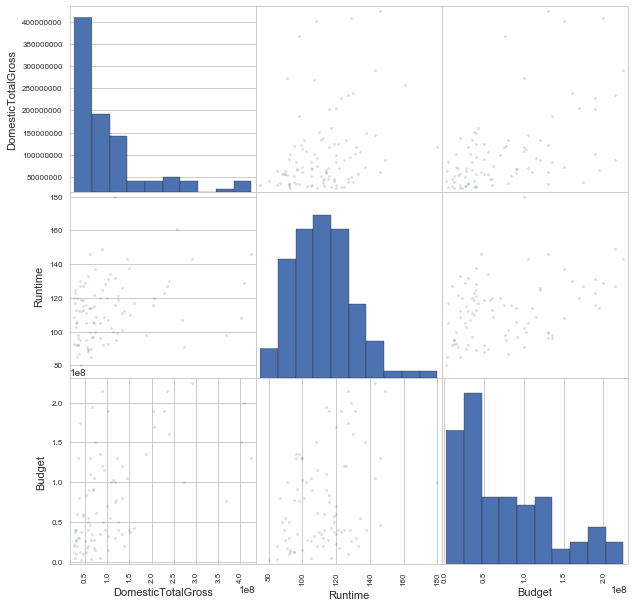

In [418]:
pd.tools.plotting.scatter_matrix(df[['DomesticTotalGross', 'Runtime','Budget']], alpha = 0.2, figsize=(10,10));

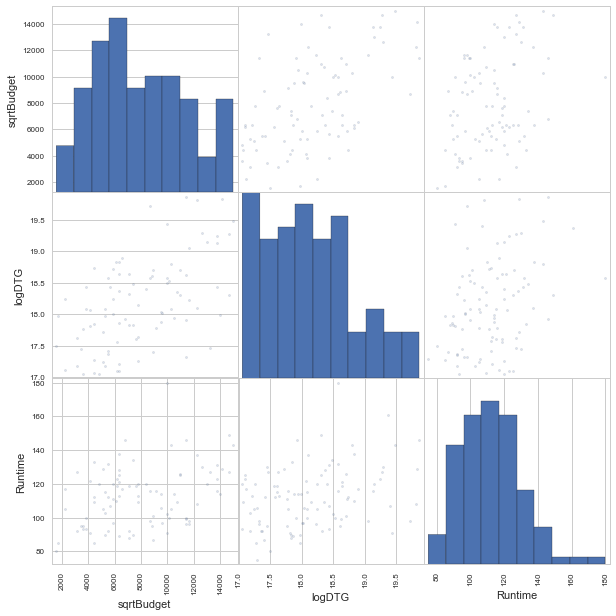

In [385]:
df['logDTG'] = np.log(df.DomesticTotalGross)
df["sqrtBudget"] = np.sqrt(df.Budget)
pd.tools.plotting.scatter_matrix(df[['sqrtBudget', 'logDTG', 'Runtime']], alpha = 0.2, figsize=(10,10));

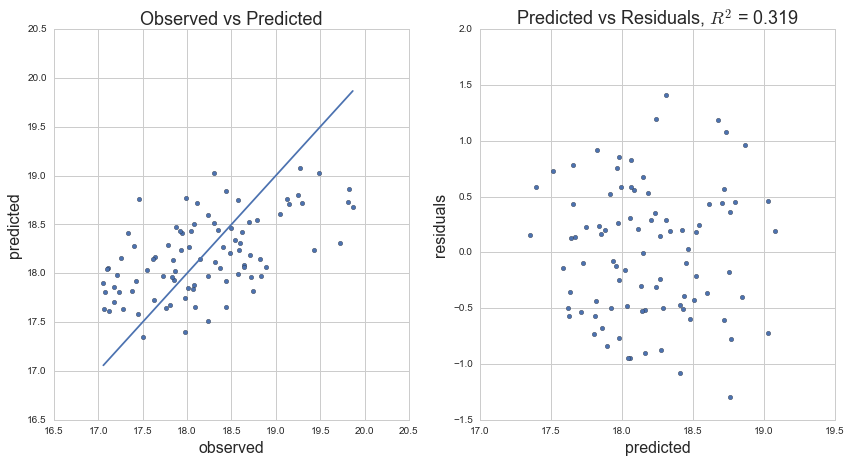

In [420]:
y, X = dmatrices('logDTG ~ sqrtBudget + Runtime + Rating', data=df, return_type='dataframe')
model = LinearRegression()
model.fit(X,y)
y_hat = model.predict(X)
residuals = y - y_hat

plt.figure(figsize=(14, 7))
sns.set(context="notebook", style = 'whitegrid', color_codes=True)

plt.subplot(1,2,1)
plt.scatter(y, y_hat)
plt.plot(y,y)
plt.xlabel('observed', fontsize = 16)
plt.ylabel('predicted', fontsize = 16)
plt.title("Observed vs Predicted", fontsize=18)

plt.subplot(1,2,2)
plt.scatter(y_hat, residuals)
plt.xlabel('predicted', fontsize = 16)
plt.ylabel('residuals', fontsize = 16)
plt.title("Predicted vs Residuals, $R^2$ = " + "{0:.3f}".format(model.score(X, y)), fontsize=18);

## Challenge 5

In [414]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1234)

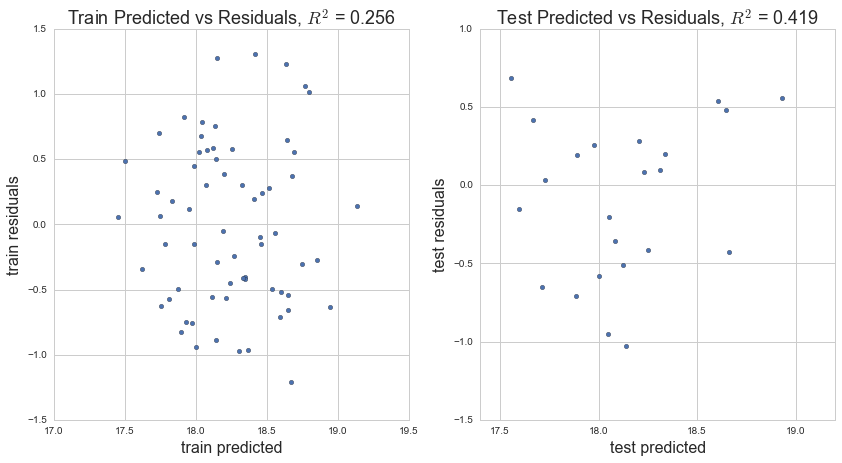

In [421]:
model = LinearRegression()
model.fit(x_train,y_train)

y_hat_test = model.predict(x_test)
residuals_test = y_test - y_hat_test

y_hat_train = model.predict(x_train)
residuals_train = y_train - y_hat_train

plt.figure(figsize=(14, 7))
sns.set(context="notebook", style = 'whitegrid', color_codes=True)

plt.subplot(1,2,1)
plt.scatter(y_hat_train, residuals_train)
plt.xlabel('train predicted', fontsize = 16)
plt.ylabel('train residuals', fontsize = 16)
plt.title("Train Predicted vs Residuals, $R^2$ = " + "{0:.3f}".format(model.score(x_train, y_train)), fontsize=18)

plt.subplot(1,2,2)
plt.scatter(y_hat_test, residuals_test)
plt.xlabel('test predicted', fontsize = 16)
plt.ylabel('test residuals', fontsize = 16)
plt.title("Test Predicted vs Residuals, $R^2$ = " + "{0:.3f}".format(model.score(x_test, y_test)), fontsize=18);

The fit on the test set is surprisingly better than on the train set, I think this is a random effect due to sampling by train_test_split function. Also, I noticed as soon as I change the splitting pattern, R-squared for testing data varies a lot, which means the model is not fitted well.